In [1]:
import pandas as pd
import os
from pathlib import Path

In [2]:
# DOR Monthly Data

base = Path(r"J:\ADMIN-eFILES\CHEN_W154867_VXC\z_Reports\Monthly Operating Statements")

year_dirs = [p for p in base.iterdir() if p.is_dir() and p.name.isdigit()]
if not year_dirs:
    raise FileNotFoundError(f"No year folders found under {base!s}")
latest_year_dir = max(year_dirs, key=lambda p: int(p.name))

pattern_files = list(
    latest_year_dir.glob("Cumulative Report - Operating Statements - *.xlsx")
)
xlsx_files = pattern_files or list(latest_year_dir.glob("*.xlsx"))
if not xlsx_files:
    raise FileNotFoundError(f"No .xlsx files found in {latest_year_dir!s}")

latest_report = max(xlsx_files, key=lambda p: p.stat().st_mtime)

report_path = latest_report
print(report_path)

dor = pd.read_excel(report_path, sheet_name="Summary - DC only", skiprows=6)


dor_end_date = report_path.stem.split(" - ")[-2]

dor_end_date = (
    pd.to_datetime(dor_end_date, format="%m%y", errors="raise")
    .to_period("M")
    .to_timestamp("M")
    .date()
)

print(dor_end_date)

J:\ADMIN-eFILES\CHEN_W154867_VXC\z_Reports\Monthly Operating Statements\2025\Cumulative Report - Operating Statements - 1125 - Hard Coded.xlsx
2025-11-30


In [3]:
# TRAC Data

trac_raw = pd.read_json(r"J:\TRAC\TRAC_Data.json", encoding="utf_16")

trac = pd.json_normalize(trac_raw["TRAC_Data"])

trac.index = trac_raw.index

s = trac["Agreement_CreatedDate"]
res = pd.to_datetime(s, format="%Y-%m-%dT%H:%M:%S.%f", errors="coerce")
res = res.fillna(pd.to_datetime(s, format="%Y-%m-%dT%H:%M:%S", errors="coerce"))
res = res.fillna(pd.to_datetime(s, errors="coerce"))

trac["Agreement_CreatedDate"] = res

In [4]:
# Florence Data

# today_date = pd.Timestamp.today().date()
# print(today_date)

# florence_folder = r"J:\Florence"

# # Document Audit Data
# flor_doc_audit = pd.read_json(
#     os.path.join(florence_folder, f"kpnc_document_audit_{today_date}.json"),
# )

# # Document Latest Version Data
# flor_doc_latest = pd.read_json(
#     os.path.join(florence_folder, f"kpnc_document_latest_version_{today_date}.json"),
# )

# # Document Pending Signature Request Data
# flor_doc_pending = pd.read_json(
#     os.path.join(
#         florence_folder, f"kpnc_document_pending_signature_request_{today_date}.json"
#     ),
# )

# # Document Report Data
# flor_doc_report = pd.read_json(
#     os.path.join(florence_folder, f"kpnc_document_report_{today_date}.json"),
# )

In [5]:
# Appian Data

appian = pd.read_excel(
    r"C:\Users\O304312\Downloads\SQL for Reporting v5.7.xlsx",
    sheet_name="Output",
)

Text(0.5, 0, 'Days to Complete Task')

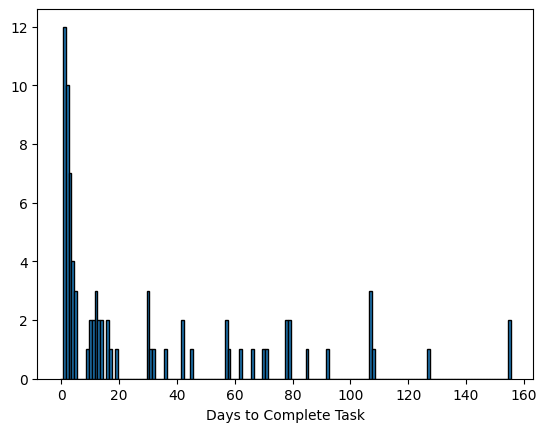

In [ ]:
days = appian["Days to Complete Task"]
days = pd.to_numeric(days, errors="coerce")
days = days.dropna().astype(int)
days = days[days >= 1]

import matplotlib.pyplot as plt
import numpy as np

plt.hist(days, bins=np.arange(0, days.max() + 2) - 0.5, edgecolor="black")
plt.xlabel("Days to Complete Task")

In [ ]:
# ViewPoint Data


def recent_json_from_folder(folder_path):
    files = [f for f in os.listdir(folder_path) if f.endswith(".json")]
    latest_file = max(files)
    data = pd.read_json(
        os.path.join(folder_path, latest_file),
        encoding="utf_8",
    )
    return data


# Accountables Data
vp_accountables_folder = r"J:\VIEWPOINT\Accountables_Response"
vp_accountables = recent_json_from_folder(vp_accountables_folder)

# Network Study Details Data
vp_study_details_folder = r"J:\VIEWPOINT\NetworkStudyDetails_Response"
vp_study_details = recent_json_from_folder(vp_study_details_folder)

# Participant Data
vp_participant_folder = r"J:\VIEWPOINT\Participant_Response"
vp_participants = recent_json_from_folder(vp_participant_folder)

# Participant Visit Data
vp_participant_visit_folder = r"J:\VIEWPOINT\ParticipantVisit_Response"
vp_participant_visits = recent_json_from_folder(vp_participant_visit_folder)

# Participant Visit Activity Data
vp_participant_visit_activity_folder = r"J:\VIEWPOINT\ParticipantVisitActivity_Response"
vp_participant_visit_activities = recent_json_from_folder(
    vp_participant_visit_activity_folder
)

# Site Study Details Data
vp_site_study_details_folder = r"J:\VIEWPOINT\SiteStudyDetails_Response"
vp_site_study_details = recent_json_from_folder(vp_site_study_details_folder)

Text(0.5, 0, 'Total Participants')

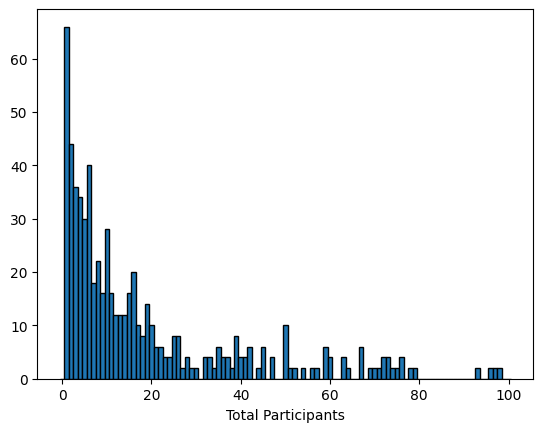

In [ ]:
people = vp_site_study_details["total_participants"]

people = pd.to_numeric(people, errors="coerce")
people = people.dropna().astype(int)
people = people[people >= 1]

import matplotlib.pyplot as plt
import numpy as np

plt.hist(people, bins=np.arange(0, 100 + 2) - 0.5, edgecolor="black")
plt.xlabel("Total Participants")